# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [159]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [160]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

SEED = 42

temps = np.array(df['temperature'])
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


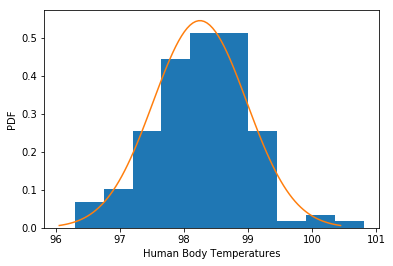

In [161]:
temps = np.array(df['temperature'])
mean, std = np.mean(temps), np.std(temps)
len_temps = len(temps)

_ = plt.hist(temps, normed = True)
_ = plt.xlabel('Human Body Temperatures')
_ = plt.ylabel('PDF')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, mean, std))
_ = plt.show()

In [162]:
chi_sq = np.sum(((temps - mean) ** 2) / mean)
deg_freedom = len_temps - 3
p_value = 1 - stats.chi2.cdf(chi_sq, deg_freedom)
p_value

1.0

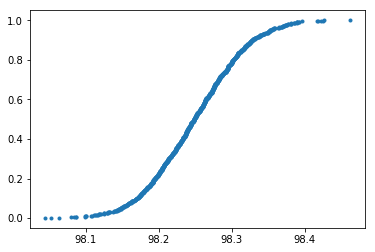

array([98.08691154, 98.41693077])

In [163]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1.0, n+1.0) / n
    
    return x, y

def draw_bs_samples(data, func, size=1):
    replicates = np.empty(size)
    len_data = len(data)
    for i in range(size):
        sample_temps = np.random.choice(data, len_data)
        replicates[i] = func(sample_temps)
        
    return replicates

replicate_temps = draw_bs_samples(temps, np.mean, 1000)


x_theor, y_theor = ecdf(replicate_temps)
_ = plt.plot(x_theor, y_theor, marker = '.', linestyle = 'none')
_ = plt.show()

conf_interval = np.percentile(replicate_temps, [0.5, 99.5])
conf_interval

In [164]:
t_stat = (mean - 98.6) / (std / np.sqrt(len_temps))
pval_ttest = stats.t.sf(np.abs(t_stat), len_temps - 1) * 2

print(' t-statistic: ', t_stat, '\n', 'p-value: ', pval_ttest)

#pval = stats.ttest_1samp(temps, 98.6)
# Computing the t-statistic and p-value from a 2-tailed t-test using ttest_lsamp from Python's stats package. 
# (Gives the same results)

 t-statistic:  -5.4759252020785585 
 p-value:  2.1887464624050777e-07


In [165]:
z_score = (mean - 98.6) / (std / np.sqrt(len_temps))
pval_ztest = stats.norm.cdf(z_score) * 2

print(' z-score: ', z_score, '\n', 'p-value: ', pval_ztest)

 z-score:  -5.4759252020785585 
 p-value:  4.3523151658713056e-08


In [166]:
np.random.seed(SEED)
inds = np.arange(len_temps)
random_indeces = np.random.choice(inds, 10)
temps_10_sample = temps[random_indeces]
temps_10_sample, np.mean(temps_10_sample)

(array([98. , 98.8, 97.8, 97. , 97.7, 98.3, 98. , 97.9, 99. , 98. ]), 98.05)

In [167]:
t_stat = (np.mean(temps_10_sample) - mean) / (np.std(temps_10_sample) / np.sqrt(10))
pval_ttest = stats.t.sf(np.abs(t_stat), len(temps_10_sample) - 1) * 2

print(' t-statistic: ', t_stat, '\n', 'p-value: ', pval_ttest)

 t-statistic:  -1.1811778014056444 
 p-value:  0.2678034290858918


In [168]:
z_score = (np.mean(temps_10_sample) - mean) / (std / np.sqrt(10))
pval_ztest = stats.norm.cdf(z_score) * 2

print(' z-score: ', z_score, '\n', 'p-value: ', pval_ztest)

 z-score:  -0.8626224419778312 
 p-value:  0.38834508732539996
